# **CARDIO VASCULAR DISEASE DETECTION**

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Load the data
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab

Saving cardio_train.csv to cardio_train (1).csv


In [ ]:
#Store the data into the df variable
df = pd.read_csv('cardio_train.csv',sep=';')
df.head(7) #Print the first 10 rows

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
5,995,21143,1,164,61.0,100,70,1,1,0,0,1,0
6,996,18085,1,162,72.0,100,70,1,1,0,0,1,0


In [ ]:
#Get the shape of the data (the number of rows & columns)
df.shape

(69301, 13)

In [ ]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [ ]:
#Count the empty (NaN, NAN, na) values in each column
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
#View some basic statistical details like percentile, mean, standard deviation etc.
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
df['gender'].unique()
#it shows yhe unique values of that particular column.

array([1, 2])

In [ ]:
df.head(50)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
5,995,21143,1,164,61.0,100,70,1,1,0,0,1,0
6,996,18085,1,162,72.0,100,70,1,1,0,0,1,0
7,997,22547,1,161,93.0,140,90,2,1,0,0,1,1
8,999,21250,1,157,68.0,110,80,1,1,0,0,1,0
9,1000,22446,1,158,65.0,140,90,3,1,0,0,1,1


In [ ]:
df.drop(['id'],axis=1,inplace=True)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0


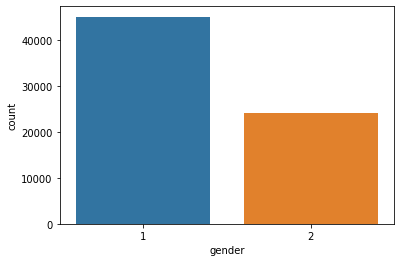

In [ ]:
sns.countplot(x='gender',data=df)

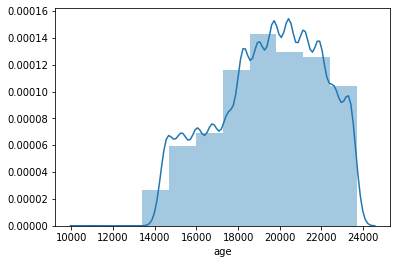

In [ ]:

sns.distplot(df['age'],bins=10)

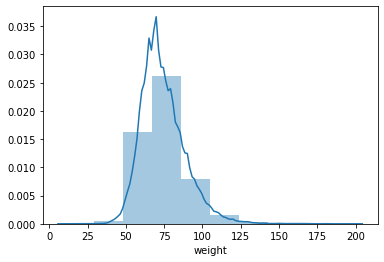

In [ ]:
sns.distplot(df['weight'],bins=10)

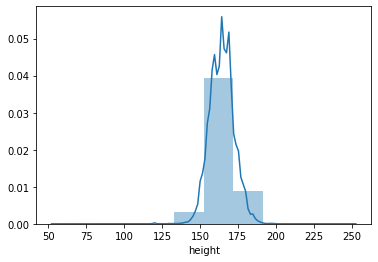

In [ ]:

sns.distplot(df['height'],bins=10)

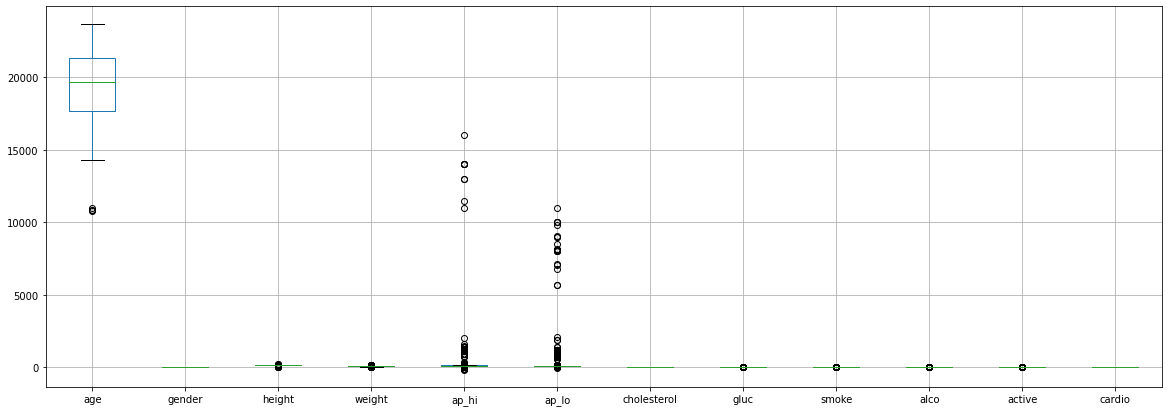

In [ ]:
df.boxplot(figsize=(20,7))

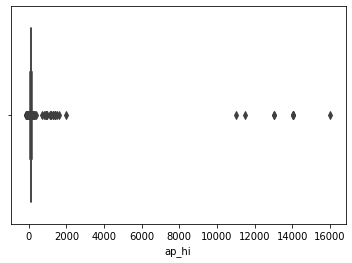

In [ ]:
sns.boxplot(df['ap_hi'])

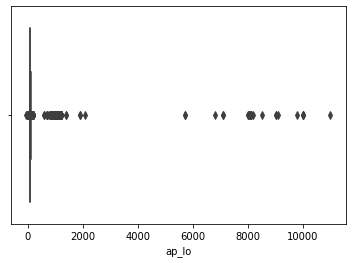

In [ ]:

sns.boxplot(df['ap_lo'])

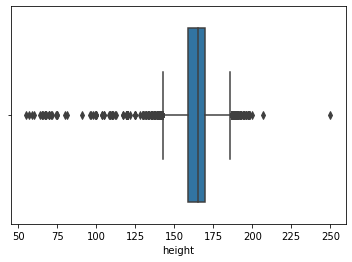

In [ ]:
sns.boxplot(df['height'])

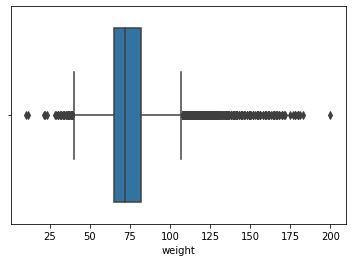

In [ ]:
sns.boxplot(df['weight'])

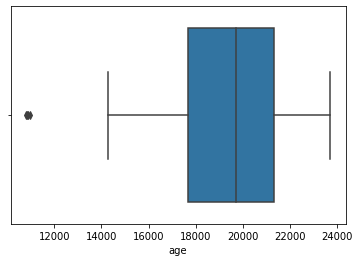

In [ ]:
sns.boxplot(df['age'])

In [ ]:
def remove_outlier(df_in, col_name, thres=1.5):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-thres*iqr
    fence_high = q3+thres*iqr
    mask = (df_in[col_name] > fence_high) | (df_in[col_name] < fence_low)
    df_in.loc[mask, col_name] = np.nan
    return df_in

In [ ]:

remove_outlier(df,'ap_hi')
remove_outlier(df,'ap_lo')
remove_outlier(df,'height')
remove_outlier(df,'weight')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155.0,69.0,130.0,80.0,2,2,0,0,1,0
1,14648,1,163.0,71.0,110.0,70.0,1,1,0,0,1,1
2,21901,1,165.0,70.0,120.0,80.0,1,1,0,0,1,0
3,14549,2,165.0,85.0,120.0,80.0,1,1,1,1,1,0
4,23393,1,155.0,62.0,120.0,80.0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69296,19240,2,168.0,76.0,120.0,80.0,1,1,1,0,1,0
69297,22601,1,158.0,NaN,140.0,90.0,2,2,0,0,1,1
69298,19066,2,183.0,105.0,NaN,90.0,3,1,0,1,0,1
69299,22431,1,163.0,72.0,135.0,80.0,1,2,0,0,0,1


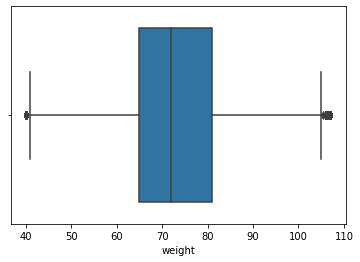

In [ ]:
sns.boxplot(df['weight'])

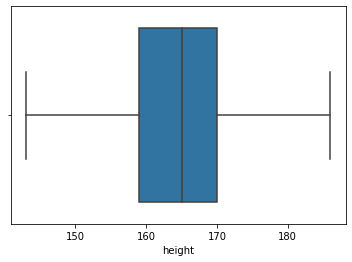

In [ ]:

sns.boxplot(df['height'])

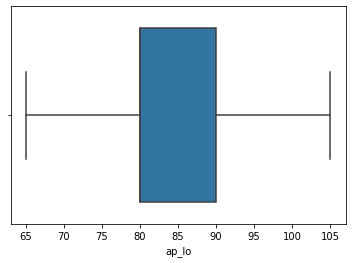

In [ ]:

sns.boxplot(df['ap_lo'])

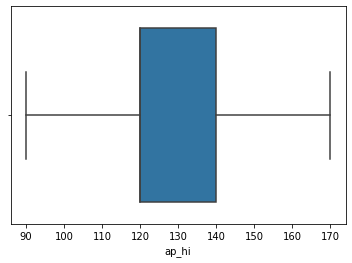

In [ ]:
sns.boxplot(df['ap_hi'])

In [ ]:
df.isnull().sum()

age               0
gender            0
height          515
weight         1802
ap_hi          1419
ap_lo          4584
cholesterol       0
gluc              0
smoke             0
alco              0
active            0
cardio            0
dtype: int64

In [ ]:
df['height'].fillna(df['height'].median(), inplace=True)
df['weight'].fillna(df['weight'].mean(), inplace=True)
df['ap_hi'].fillna(df['ap_hi'].mean(), inplace=True)
df['ap_lo'].fillna(df['ap_lo'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6769b67b38>,
      dtype=object)

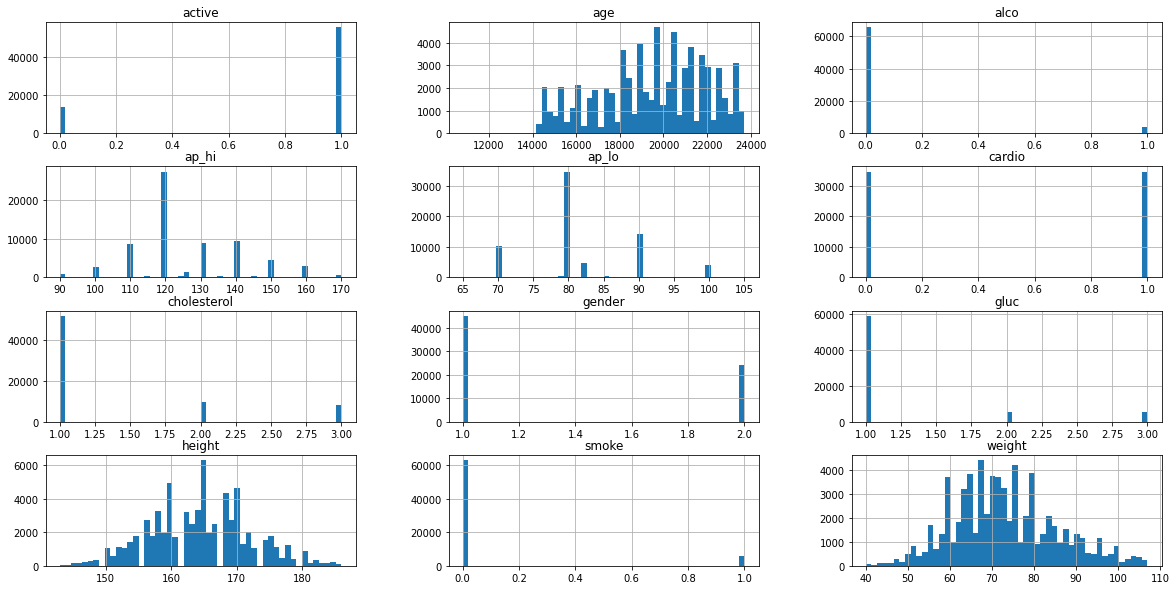

In [ ]:
df.hist(bins=50,figsize=(20,10))

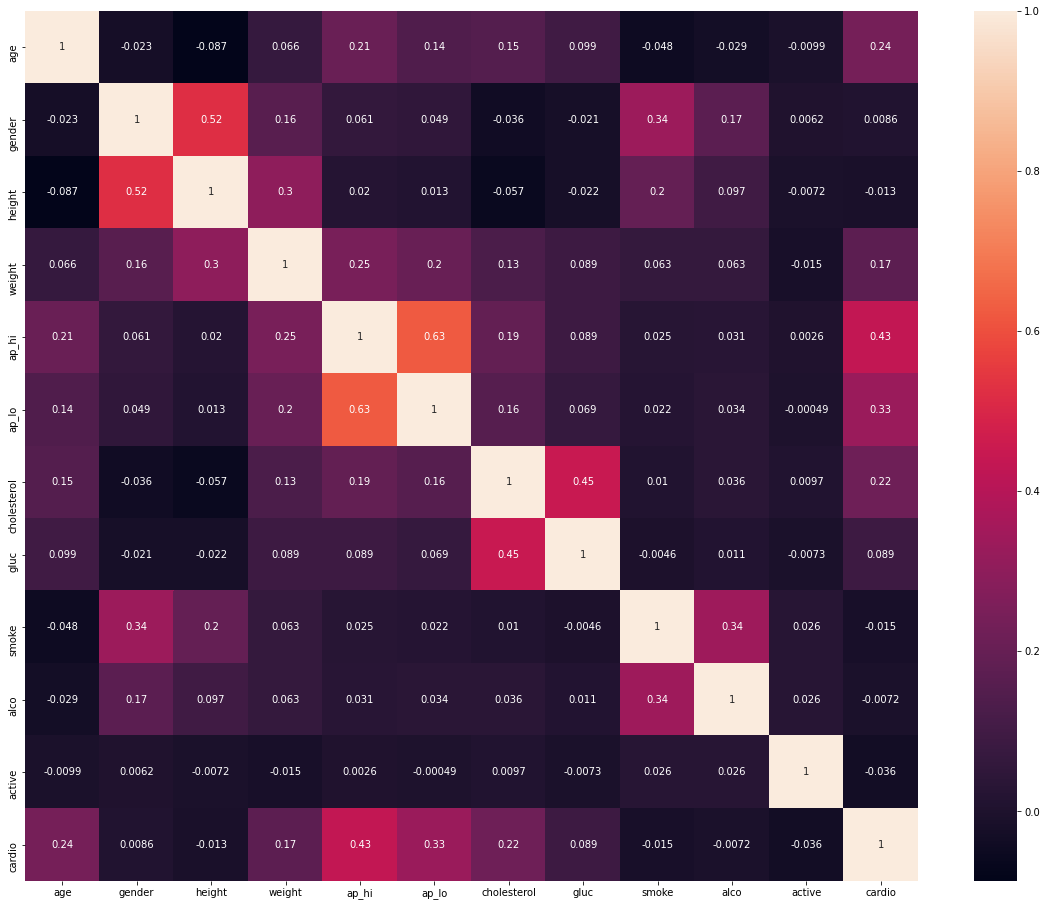

In [ ]:
corr_hmap=df.corr()
plt.figure(figsize=(20,16))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [ ]:
#the code below gives the distinct values count of dataframe 
count_classes=pd.value_counts(df['cardio'],sort=True)
count_classes

0    34679
1    34622
Name: cardio, dtype: int64

In [ ]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model=ExtraTreesClassifier()
model.fit(x,y)

print(model.feature_importances_)

[0.29647497 0.01150092 0.17436086 0.18282872 0.1730996  0.08532941
 0.04069021 0.01475332 0.00654404 0.00629271 0.00812525]


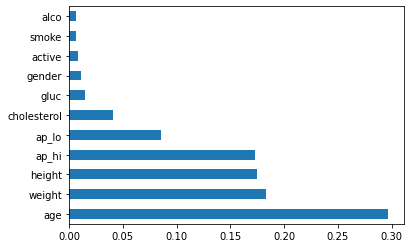

In [ ]:
#plot graph for important features.
feat_importances=pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(16).plot(kind='barh')
plt.show()

In [ ]:

from sklearn.model_selection import train_test_split

x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

x.shape,y.shape

((69301, 11), (69301,))

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=54)

In [ ]:
import sklearn

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:

model=[LDA(),LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),DecisionTreeClassifier(),LinearSVC(),GaussianNB()]

for m in model:
    print("Model :",m ,"\n")
    
    m.fit(x_train,y_train)
    print("Model Score :",m.score(x_train,y_train) ,"\n")  
    
    predm=np.array(m.predict(x_test))
    print("Model Pediction :",predm  ,"\n")
    
    print("Confusion Matrix :","\n", confusion_matrix(y_test,predm)  ,"\n")
    
    print("Accuracy Score : ", accuracy_score(y_test,predm)  ,"\n")
    
    print("Classification Report : ", classification_report(y_test,predm) ,"\r\r\n\n\n")

Model : LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001) 

Model Score : 0.7257720057720057 

Model Pediction : [1 0 0 ... 1 0 0] 

Confusion Matrix : 
 [[6841 1877]
 [2879 5729]] 

Accuracy Score :  0.725499249682558 

Classification Report :                precision    recall  f1-score   support

           0       0.70      0.78      0.74      8718
           1       0.75      0.67      0.71      8608

    accuracy                           0.73     17326
   macro avg       0.73      0.73      0.72     17326
weighted avg       0.73      0.73      0.72     17326
 



Model : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_

In [ ]:
rc=RandomForestClassifier()
rc.fit(x_train,y_train)
predm=rc.predict(x_test)
print(predm)

[1 0 0 ... 1 0 0]


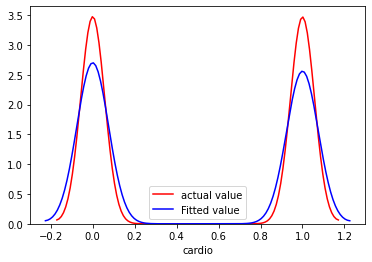

In [ ]:

ax1=sns.distplot(df['cardio'],hist=False,color='r',label='actual value')

sns.distplot(predm,hist=False,color='b',label='Fitted value',ax=ax1)

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,predm)

0.28500519450536765

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
predm=lr.predict(x_test)
print(predm)

[1 0 0 ... 1 0 0]


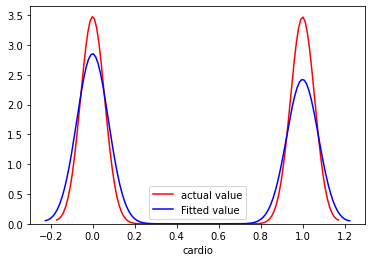

In [ ]:
ax1=sns.distplot(df['cardio'],hist=False,color='r',label='actual value')

sns.distplot(predm,hist=False,color='b',label='Fitted value',ax=ax1)

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,predm)

0.30468659817615146

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,predm))

print(confusion_matrix(y_test, predm))

              precision    recall  f1-score   support

           0       0.68      0.73      0.71      8718
           1       0.71      0.66      0.68      8608

    accuracy                           0.70     17326
   macro avg       0.70      0.70      0.69     17326
weighted avg       0.70      0.70      0.69     17326

[[6405 2313]
 [2966 5642]]


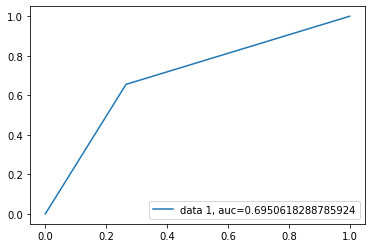

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test, predm)
auc = metrics.roc_auc_score(y_test, predm)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()